<h1><center>Building an Information Retrieval System</center></h1>
In this file, we will explore a way to rank the documents according to given query to get relevant documents (kind of a search engine). 

### Task 1:
- import relevant python packages  

In [1]:
import os
import sys
import json
import re
from gensim.parsing.preprocessing import remove_stopwords
import pandas as pd
import math
import numpy as np
from numpy import linalg as LA
# write code to import other packages here

### Task 2
- Read the names of all text files given in the data folder
- Read all text files and save them in a list in a way that words of all files are saved in seperate lists
- All words must have all lower case letters
- Remove stop words (very common words such "this", "The", "is", you can search for stop words), punctuations marks or other special chracters or html tags (hint: use regular expression)

In [2]:
files = os.listdir("./data")
doc_names = []
files_list = []
word_list = []
j = 0
common_words= ["the", "is", "in", "at", "on", "this", "that", "a", "an",
               "i", "am", "them", "who", "what", "when", "where", "how"]
for i, doc in enumerate(files):
    if i==100:  # change to 3000 to run for all files
        break
#     f = open('./data/'+doc, "r", encoding='utf-8')
    f = open('./data/'+doc, "r", encoding='iso-8859-15')
    try:
        file = f.read().lower()  # Converting text to lower case
        file = remove_stopwords(file) # Removing stop words
        file = re.sub('[^a-zA-Z0-9 \n\.]', '', file) # Removing punctuation marks
        file = re.sub('[.]', '', file)
        file = re.sub(r'[0-9]+', '', file)
        file = file.strip().split(" ") # Converting each text file to a list using space as delimiter
        files_list.append(file) # List containing all the files separately
        word_list.extend(file) # List containing all the words from all files in one single file
        doc_names.append(doc)
    except:
        j+=1
        
print(f"An exception occurred in {j} out of {i} files")
# Write code here

An exception occurred in 0 out of 100 files


In [3]:
word_list

['proceedings',
 '',
 'conference',
 'empirical',
 'methods',
 'natural',
 'language',
 'processing',
 'pages',
 '',
 'lisbon',
 'portugal',
 '',
 'september',
 '',
 'c',
 'association',
 'computational',
 'linguistics',
 'crossdocument',
 'event',
 'coreference',
 'resolution',
 'based',
 'crossmedia',
 'features',
 'tongtao',
 'zhang',
 '',
 '',
 'hongzhi',
 'li',
 '',
 '',
 'heng',
 'ji',
 '',
 '',
 'shihfu',
 'chang',
 '',
 '',
 'science',
 'department',
 'rensselaer',
 'polytechnic',
 'institute',
 'zhangt',
 'jihrpiedu',
 '',
 'department',
 'science',
 'columbia',
 'university',
 'hongzhili',
 'shihfuchangcolumbiaedu',
 'abstract',
 'paper',
 'focus',
 'new',
 'problem',
 'event',
 'coreference',
 'resolution',
 'televi',
 'sion',
 'news',
 'videos',
 'based',
 'observa',
 'tion',
 'contents',
 'multiple',
 'data',
 'modalities',
 'complementary',
 'develop',
 'novel',
 'approach',
 'jointly',
 'encode',
 'effec',
 'tive',
 'features',
 'closed',
 'captions',
 'video',
 'key',
 

### Task 3: Create a vocabulary 
- Get all unique words in all documents (corpus) and save them in a list 
- Get count of each word in whole corpus and save each word and its count in a dictionary
- Create a dictionary that assign each unique word a unique id (so that we can represent each word using a unique id)
- Create a dictionaty that assign each unique id a word (so that we can convert each id to back to the original word)
- Calculate some basic statistics too:
       - Total Number of Documents 
       - Total Number of Unique Words 
       - Total Number of Words in each Document 

In [4]:
# Write code here
unique_words = set(word_list)
unique_words_per_file = [set(file) for file in files_list]
count = pd.Series(word_list).value_counts()
unique_words_count = dict(count)
print(f"Total number of Documents:{len(files_list)}")
print(f"Total number of Unique words:{len(unique_words)}")

Total number of Documents:100
Total number of Unique words:27482


In [5]:
word_dict = {}  # Creating a dictionary of all the words, initialized with 0 count
for word in unique_words:
    word_dict[word] = 0

### Task 4
- Calculate term frequency (for each word in each document)
    - Calcuate how many times each word is repeated in each document 
    - Divide word count by total number of words in the document 
    - Assign zero if word doesnt appear in the doccument 
    - t is the term or selected word
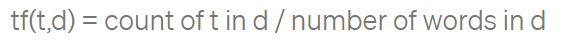
    

In [6]:
# Write code here
count_per_file = []
for i, file in enumerate(files_list):  # this loop calculates the normalized count of each word per file
    file_dict = dict(pd.Series(file).value_counts()/len(file))
    temp_dict = word_dict.copy()
    temp_dict.update(file_dict)
    temp_list = list(temp_dict.values())
    count_per_file.append(temp_list)

In [7]:
## This loop is not being used
# for i,file in enumerate(count_per_file):  # this loop assigns 0 to all the words, not present in the document
#     words_not_present = unique_words - unique_words_per_file[i]
#     for word in words_not_present:
#         file[word] = 0

### Task 5
- Calculate document frequency (for each word)
    - Calculate the total number documents in which each word appears  
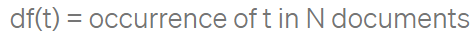

In [8]:
# Write code here
word_count = {}
for word in unique_words:
    count = 0
    for doc in unique_words_per_file:
        if word in doc:
            count+=1
            word_count[word] = count

In [9]:
len(word_count)

27482

### Task 6
- Calculate inverse document frequency for each word in the vocabulary
    - IDF is the inverse of the document frequency which measures the informativeness of term t
    - The formula to calculate the idf is as following 
    
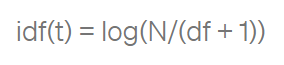

In [10]:
# Write code here
inv_word_count = []
for k,v in word_count.items():
    inv_word_count.append(math.log(len(files_list)/(v+1)))

### Task 7
- Calculate tf-idf for each word of each document 
    - Formula to calculate the tf-idf is as following:
        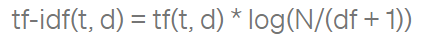

In [11]:
### This code is not being used
# # # Write code here
# tf_idf = []
# for file in count_per_file:
#     tf_idf_per_doc = []
#     tf_idf.append(tf_idf_per_doc)
#     for v1, v2 in zip(file, inv_word_count.values()):
#         tf_idf_per_doc.append(v1 * v2)

In [12]:
count_array = np.array(count_per_file)
count_array_idf = np.array(count_per_file)
for i, val in enumerate(inv_word_count):
    count_array_idf[:,i] = count_array[:,i]*val

### Task 8
- Create a sparse matrix that stores the frequency of each word in each document (this is something similar to what you have already done)
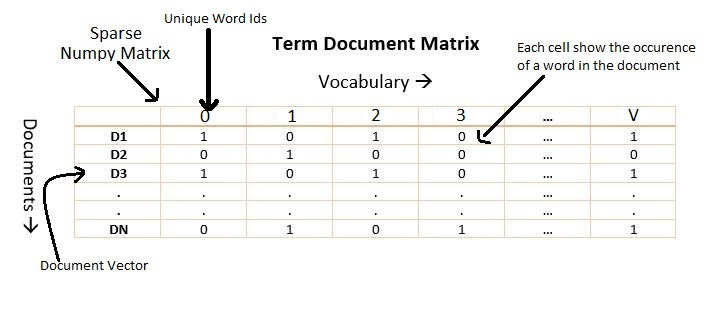

In [13]:
# Write code here
# sparse_matrix = np.array(count_per_file)
    
# sparse_matrix.shape
sparse_matrix = count_array

### Task 9: Query matching using Cosine Similarity
- Take a search query from user as an input 
- Treat query as a document and:
    - Apply same preprocessing to the query
    - Calculate term frequencies in query
- Now use cosine similarity to calculate the similaraity of a document to the given query (use query (term frequencies) vector and sparse matrix containing term frequencies)
- Sort cosine similarities with all given documents to get most relevant documents 
- Display top 5 relevant documents and explore if they are actually relevant or not

In [14]:
# Write code here

# document preprocessing steps
# source = "A92-1033.pdf.txt"
# f = open("./data/"+source, "r", encoding='iso-8859-15')
# source = f.read().lower()
# f.close()
source = "natural language processing"
file = remove_stopwords(source)
file = re.sub('[^a-zA-Z0-9 \n\.]', '', file)
file = re.sub('[.]', '', file)
file = re.sub(r'[0-9]+', '', file)
file = file.strip().split(" ")

# Calculating term frequencies in query
count_per_file = []
unique_words_in_file = set(file)
file_dict = dict(pd.Series(file).value_counts()/len(file))
temp_dict = word_dict.copy()
temp_dict.update(file_dict)
temp_list = list(temp_dict.values())
count_per_file.append(temp_list)
        
query_vector = np.array(count_per_file)

# Calculate cosine similarity with each vector in our database
result = []
for vector in sparse_matrix:
    result.extend(query_vector @ vector.T/(LA.norm(query_vector)*LA.norm(vector)))

result = np.array(result)
sorted_ind = np.argsort(result)
sorted_result = result[sorted_ind]

# Displaying results and similar images
f = open("./result_with_simple_model_2", 'w')
f.write(f"The source is: {source}\n")
print(f"The top 5 scores are:")
for i in range(-1, -6, -1):
    print(f"score: {sorted_result[i]}")
    print(f"file name: {doc_names[sorted_ind[i]]}")
    f.write(f"score: {sorted_result[i]}\n")
    f.write(f"file name: {doc_names[sorted_ind[i]]}\n")
f.close()

The top 5 scores are:
score: 0.2346436674452809
file name: E91-1043.pdf.txt
score: 0.2121029533553405
file name: A92-1033.pdf.txt
score: 0.20258674779411562
file name: J06-1006.pdf.txt
score: 0.18070320722629782
file name: E83-1032.pdf.txt
score: 0.1334986139883439
file name: E83-1021.pdf.txt


### Task 10: Query matching using Vector Space Model
- Calculate the similarities using vector space model in following way:
    - Apply same preprocessing to the query
    - Calculate the tfidf of the query in the same way (here term frequencies are the calculated using query while idf scores are same as calculated above)
    - Use cosine similarity between documents and query (based on tfidf) and rank the documents according to the similarity score 
- Display top 5 relevant documents and explore if they are actually relevant or not

In [15]:
# Write code here
sparse_matrix = count_array_idf
# document preprocessing steps
# source = "A92-1033.pdf.txt"
# f = open("./data/"+source, "r", encoding='iso-8859-15')
# source = f.read().lower()
# f.close()
source = "natural language processing"
file = remove_stopwords(source)
file = re.sub('[^a-zA-Z0-9 \n\.]', '', file)
file = re.sub('[.]', '', file)
file = re.sub(r'[0-9]+', '', file)
file = file.strip().split(" ")

# Calculating term frequencies in query
count_per_file = []
unique_words_in_file = set(file)
file_dict = dict(pd.Series(file).value_counts()/len(file))
temp_dict = word_dict.copy()
temp_dict.update(file_dict)
temp_list = list(temp_dict.values())
count_per_file.append(temp_list)
        
query_vector = np.multiply(np.array(count_per_file), np.array(inv_word_count))

# Calculate cosine similarity with each vector in our database
result = []
for vector in sparse_matrix:
    result.extend(query_vector @ vector.T/(LA.norm(query_vector)*LA.norm(vector)))

result = np.array(result)
sorted_ind = np.argsort(result)
sorted_result = result[sorted_ind]

# Displaying results and similar images
f = open("./result_with_vector_space_model_2", 'w')
f.write(f"The source is: {source}\n")
print(f"The top 5 scores are:")
for i in range(-1, -6, -1):
    if sorted_result[i]>0:
        print(f"score: {sorted_result[i]}")
        print(f"file name: {doc_names[sorted_ind[i]]}")
        f.write(f"score: {sorted_result[i]}\n")
        f.write(f"file name: {doc_names[sorted_ind[i]]}\n")
f.close()

The top 5 scores are:
score: 0.027448776863482714
file name: E91-1043.pdf.txt
score: 0.014884553356514578
file name: E83-1032.pdf.txt
score: 0.014686612498467897
file name: A92-1033.pdf.txt
score: 0.013259929831872238
file name: J06-1006.pdf.txt
score: 0.012501306439792881
file name: J01-1011.pdf.txt
